In [76]:
import math
import pickle
import gzip
import gc
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statistics import mean
%matplotlib inline

In [30]:
gc.enable()

#Read in metadata
metadata_train=pd.read_csv('./training_sample_set_metadata.csv')
#Not using gal_l and gal_b features
del metadata_train['gal_l'], metadata_train['gal_b']

#Bin into ddf and non-ddf training
#ddf = metadata_train[(metadata_train['ddf'] == 1)]
#y_train_ddf = ddf['target']

#non_ddf = metadata_train[(metadata_train['ddf'] == 0)]
#y_train_non_ddf = non_ddf3['target']


#del metadata_train, ddf['target'], non_ddf['target'], ddf['ddf'], non_ddf['ddf']
gc.collect()

#ddf.head(10)

,object_id,ra,decl,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,615,349.046051,-61.943836,0.0000,0.0000,0.0000,NaN,0.017
1,713,53.085938,-27.784405,1.8181,1.6267,0.2552,45.4063,0.007
2,730,33.574219,-6.579593,0.2320,0.2262,0.0157,40.2561,0.021
3,745,0.189873,-45.586655,0.3037,0.2813,1.1523,40.7951,0.007
4,1124,352.711273,-63.823658,0.1934,0.2415,0.0176,40.4166,0.024
5,1227,35.683594,-5.379379,0.0000,0.0000,0.0000,NaN,0.020
6,1598,347.846710,-64.760857,0.1352,0.1820,0.0304,39.7279,0.019
7,1632,348.595886,-63.072620,0.6857,0.7014,0.0100,43.1524,0.021
8,1920,149.414062,3.433834,0.3088,0.3229,0.3360,41.1401,0.027
9,1926,149.414062,1.940072,0.0000,0.0000,0.0000,NaN,0.018


In [100]:
#Read in metadata
metadata_train=pd.read_csv('./training_sample_set_metadata.csv')
#Not using gal_l and gal_b features
#del metadata_train['ra'],metadata_train['decl'],metadata_train['gal_l'], metadata_train['gal_b'],metadata_train['hostgal_photoz'],metadata_train['hostgal_photoz_err'], metadata_train['distmod'], metadata_train['mwebv']


#Bin into ddf and non-ddf training
ddf = metadata_train[(metadata_train['ddf'] == 1)]
del ddf['ddf']

print(redshift_means)
ddf_far_away= ddf[(ddf['hostgal_specz'] >= 1.5)]
ddf_nearby= ddf[(ddf['hostgal_specz'] < 1.5)]


non_ddf = metadata_train[(metadata_train['ddf'] == 0)]
del non_ddf['ddf']

non_ddf_far_away= non_ddf[(non_ddf['hostgal_specz'] >= 1.5)]
non_ddf_nearby= non_ddf[(non_ddf['hostgal_specz'] < 1.5)]


del ddf, non_ddf, ddf_far_away['hostgal_specz'], non_ddf_far_away['hostgal_specz'], ddf_nearby['hostgal_specz'], non_ddf_nearby['hostgal_specz']
#del metadata_train, ddf['target'], non_ddf['target'], ddf['ddf'], non_ddf['ddf']
gc.collect()

ddf_far_away.head(10)


{6: 0.0, 15: 0.6693, 16: 0.0, 42: 0.2273409090909091, 52: 0.19707368421052632, 62: 0.2024969696969697, 64: 0.1391, 65: 0.0, 67: 0.24191764705882354, 88: 0.9528333333333333, 90: 0.3764378531073446, 92: 0.0, 95: 1.3887166666666666}


,object_id,ra,decl,gal_l,gal_b,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
1,713,53.085938,-27.784405,223.525509,-54.460748,1.6267,0.2552,45.4063,0.007,88
19,3423,349.615387,-63.636005,318.927246,-50.506542,1.1213,0.1591,44.4078,0.018,95
38,7409,352.398651,-62.696659,318.017427,-51.967966,0.5176,1.2609,42.3516,0.020,88
135,24193,152.050781,2.985506,237.495952,44.143927,1.3937,0.2518,44.9919,0.019,88
149,25925,35.332031,-5.979157,172.286722,-59.931743,1.7075,0.1320,45.5358,0.022,88
154,26531,351.259003,-64.386185,317.344860,-50.255113,2.4324,0.2792,46.4755,0.020,88
175,30191,150.117188,2.238686,236.784618,42.139082,1.3073,0.1521,44.8201,0.016,88
203,35315,150.468750,3.732834,235.392208,43.283244,1.5239,0.2256,45.2314,0.020,95
220,38174,1.694561,-45.191612,326.278557,-69.858253,1.7388,0.1564,45.5843,0.011,88
240,42469,2.071130,-45.191612,325.606223,-69.989264,1.4913,0.1216,45.1735,0.011,95


6 : 0.0
15 : 0.6693
16 : 0.0
42 : 0.2273409090909091
52 : 0.19707368421052632
62 : 0.2024969696969697
64 : 0.1391
65 : 0.0
67 : 0.24191764705882354
88 : 0.9528333333333333
90 : 0.3764378531073446
92 : 0.0
95 : 1.3887166666666666
{713.0: 88.0, 3423.0: 95.0, 3489.0: 88.0, 4088.0: 88.0, 7315.0: 88.0, 7409.0: 88.0, 9184.0: 88.0, 10321.0: 95.0, 10586.0: 88.0, 14539.0: 88.0, 14553.0: 95.0, 18507.0: 88.0, 23299.0: 88.0, 23373.0: 88.0, 23539.0: 95.0, 23931.0: 88.0, 24193.0: 88.0, 25925.0: 88.0, 26531.0: 88.0, 30191.0: 88.0, 31569.0: 95.0, 33422.0: 88.0, 34243.0: 88.0, 35315.0: 95.0, 38174.0: 88.0, 42469.0: 95.0, 42852.0: 88.0, 48687.0: 88.0, 48749.0: 88.0, 51178.0: 88.0, 52320.0: 88.0, 54883.0: 88.0, 58323.0: 88.0, 66967.0: 88.0, 70272.0: 88.0, 70276.0: 88.0, 71068.0: 88.0, 71676.0: 88.0, 71890.0: 88.0, 72053.0: 88.0, 73610.0: 95.0, 75987.0: 88.0, 76304.0: 95.0, 77340.0: 88.0, 77391.0: 95.0, 80205.0: 95.0, 82740.0: 88.0, 83634.0: 95.0}
{615.0: 92.0, 730.0: 42.0, 745.0: 90.0, 1124.0: 90.0, 1227

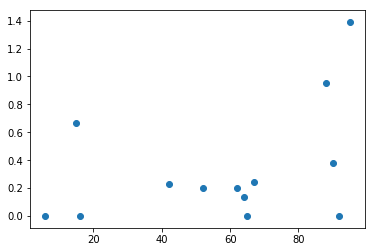

In [108]:
target_redshifts={
    6 : [] ,
    15: [],
    16: [],
    42: [],
    52: [],
   # 53: [],
    62: [],
    64: [],
    65: [],
    67: [],
    88: [],
    90: [],
    92: [],
    95: [],
    99: []
}

for index, row in metadata_train.iterrows():
    target_redshifts[row['target']].append(row['hostgal_specz'])

    
redshift_means={}
for key, value in target_redshifts.items():
    if(len(value)>0):
        redshift_means[key]=mean(value)
        print(key, ":", mean(value))
plt.scatter(x=redshift_means.keys(), y=redshift_means.values())

ddf_far_away_dict={}
ddf_nearby_dict={}
non_ddf_far_away_dict={}
non_ddf_nearby_dict={}

for index, row in metadata_train.iterrows():
    target=row['target']
    if(row['ddf']==1):
        if(redshift_means[target]>=.8):
            ddf_far_away_dict[row['object_id']]=row['target']
        else:
            ddf_nearby_dict[row['object_id']]=row['target']
    else:
        if(redshift_means[target]>=.8):
            non_ddf_far_away_dict[row['object_id']]=row['target']
        else:
            non_ddf_nearby_dict[row['object_id']]=row['target']
print(ddf_far_away_dict)
print(ddf_nearby_dict)
print(non_ddf_far_away_dict)
print(non_ddf_nearby_dict)

In [43]:
ddf_nearby.head(10)

,object_id,target
0,615,92
2,730,42
3,745,90
4,1124,90
5,1227,65
6,1598,90
7,1632,42
8,1920,90
9,1926,65
10,2072,90


<Figure size 432x288 with 0 Axes>

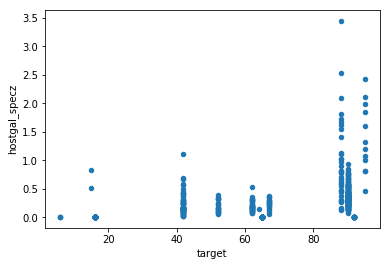

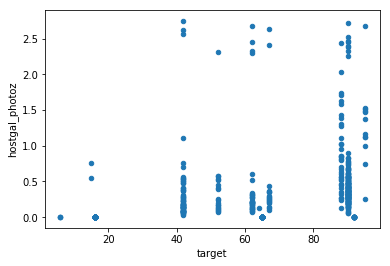

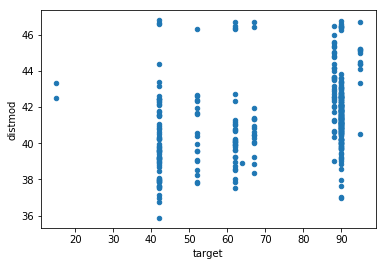

In [53]:
plt.figure()
metadata_train.plot.scatter(x='target', y='hostgal_specz')
metadata_train.plot.scatter(x='target', y='hostgal_photoz')
metadata_train.plot.scatter(x='target', y='distmod')

In [95]:
target_redshifts={
    6 : [] ,
    15: [],
    16: [],
    42: [],
    52: [],
   # 53: [],
    62: [],
    64: [],
    65: [],
    67: [],
    88: [],
    90: [],
    92: [],
    95: [],
    99: []
}

for index, row in metadata_train.iterrows():
    target_redshifts[row['target']].append(row['hostgal_specz'])
print(target_redshifts[15])

[0.5149, 0.8237]


In [97]:
means=[]
for key, value in target_redshifts.items():
    if(len(value)>0):
        means.append((key, mean(value)))
        print(key, ":", mean(value))

6 : 0.0
15 : 0.6693
16 : 0.0
42 : 0.2273409090909091
52 : 0.19707368421052632
62 : 0.2024969696969697
64 : 0.1391
65 : 0.0
67 : 0.24191764705882354
88 : 0.9528333333333333
90 : 0.3764378531073446
92 : 0.0
95 : 1.3887166666666666
